# Machine Learning -2 

## Problem 1
Context
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

Objective
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Define the problem and perform Exploratory Data Analysis

In [2]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [3]:
election.head(5)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
election.shape

(1525, 9)

In [5]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [6]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [7]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [9]:
election = election.replace(replace)

In [10]:
election["gender"].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [11]:
election["vote"].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [12]:
data = election[election.duplicated()]
data.head(1525)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,0,35,4,4,5,2,3,2,1
627,0,39,3,4,4,2,5,2,1
871,0,38,2,4,2,2,4,3,1
984,1,74,4,3,2,4,8,2,0
1155,1,53,3,4,2,2,6,0,0
1237,0,36,3,3,2,2,6,2,0
1245,0,29,4,4,4,2,2,2,0
1439,0,40,4,3,4,2,2,2,1


In [13]:
election.skew()

vote                       0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

# Univariate analysis - Multivariate analysis

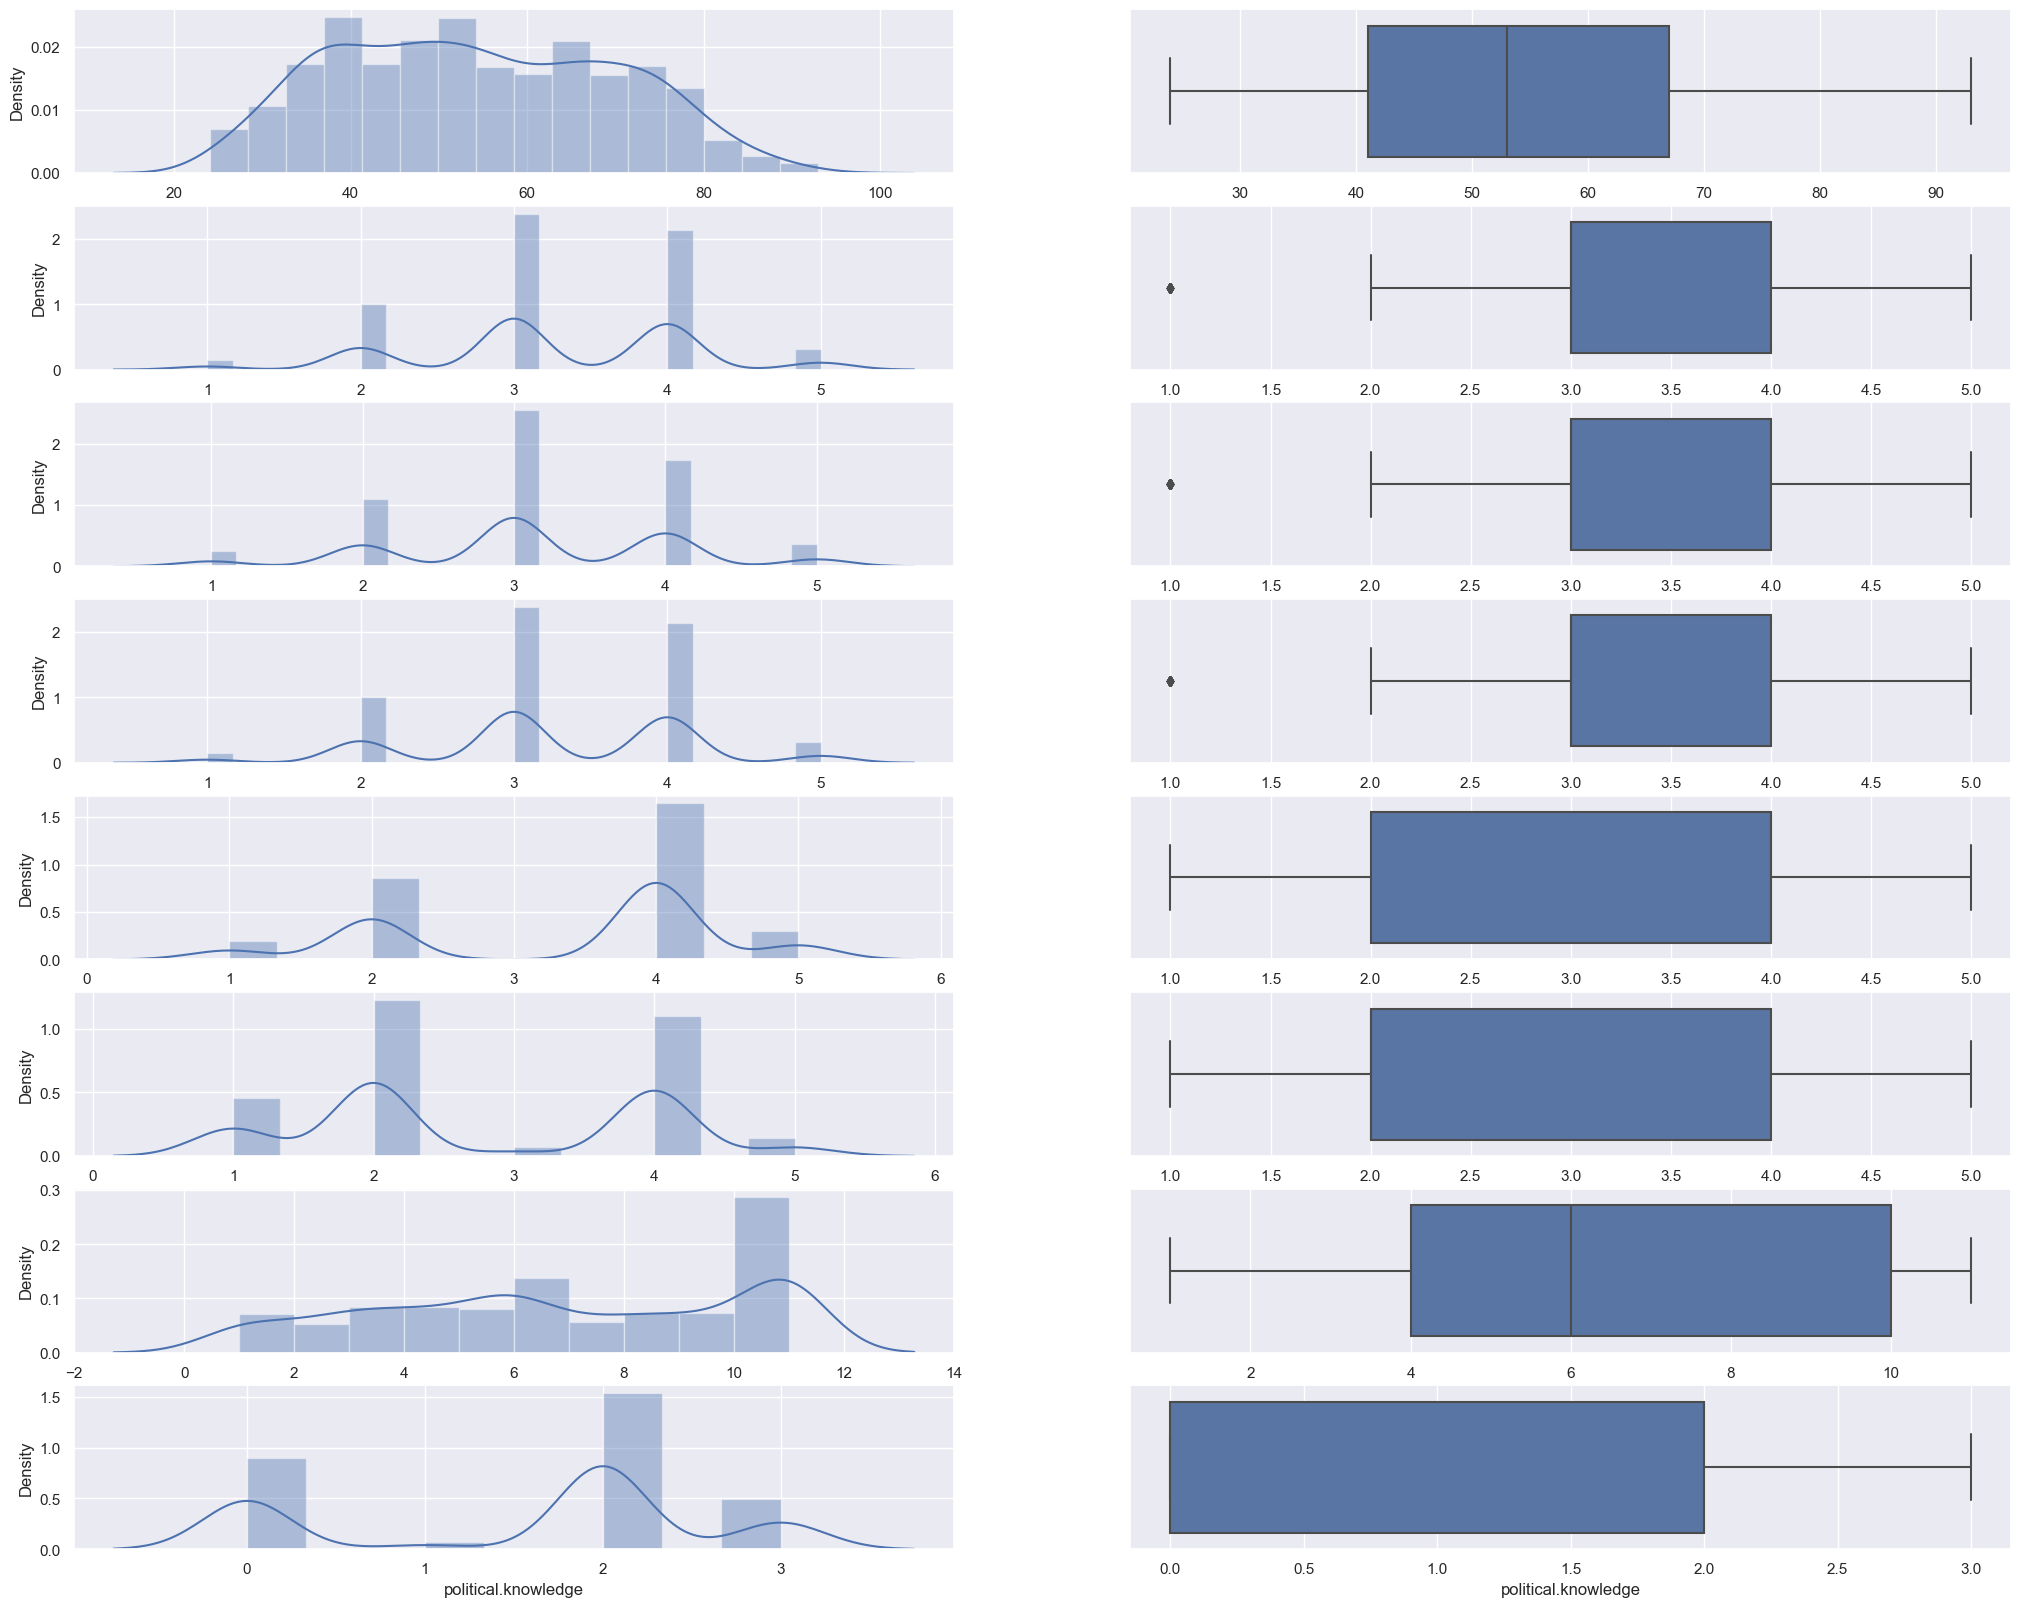

In [14]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(25, 20)

sns.distplot(election['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=election, ax=axes[0][1])
sns.distplot(election['economic.cond.national'], kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=election, ax=axes[1][1])
sns.distplot(election['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=election, ax=axes[2][1])
sns.distplot(election['economic.cond.national'], kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=election, ax=axes[3][1])
sns.distplot(election['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=election, ax=axes[4][1])
sns.distplot(election['Hague'], kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=election, ax=axes[5][1])
sns.distplot(election['Europe'], kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=election, ax=axes[6][1])
sns.distplot(election['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=election, ax=axes[7][1])

plt.show()

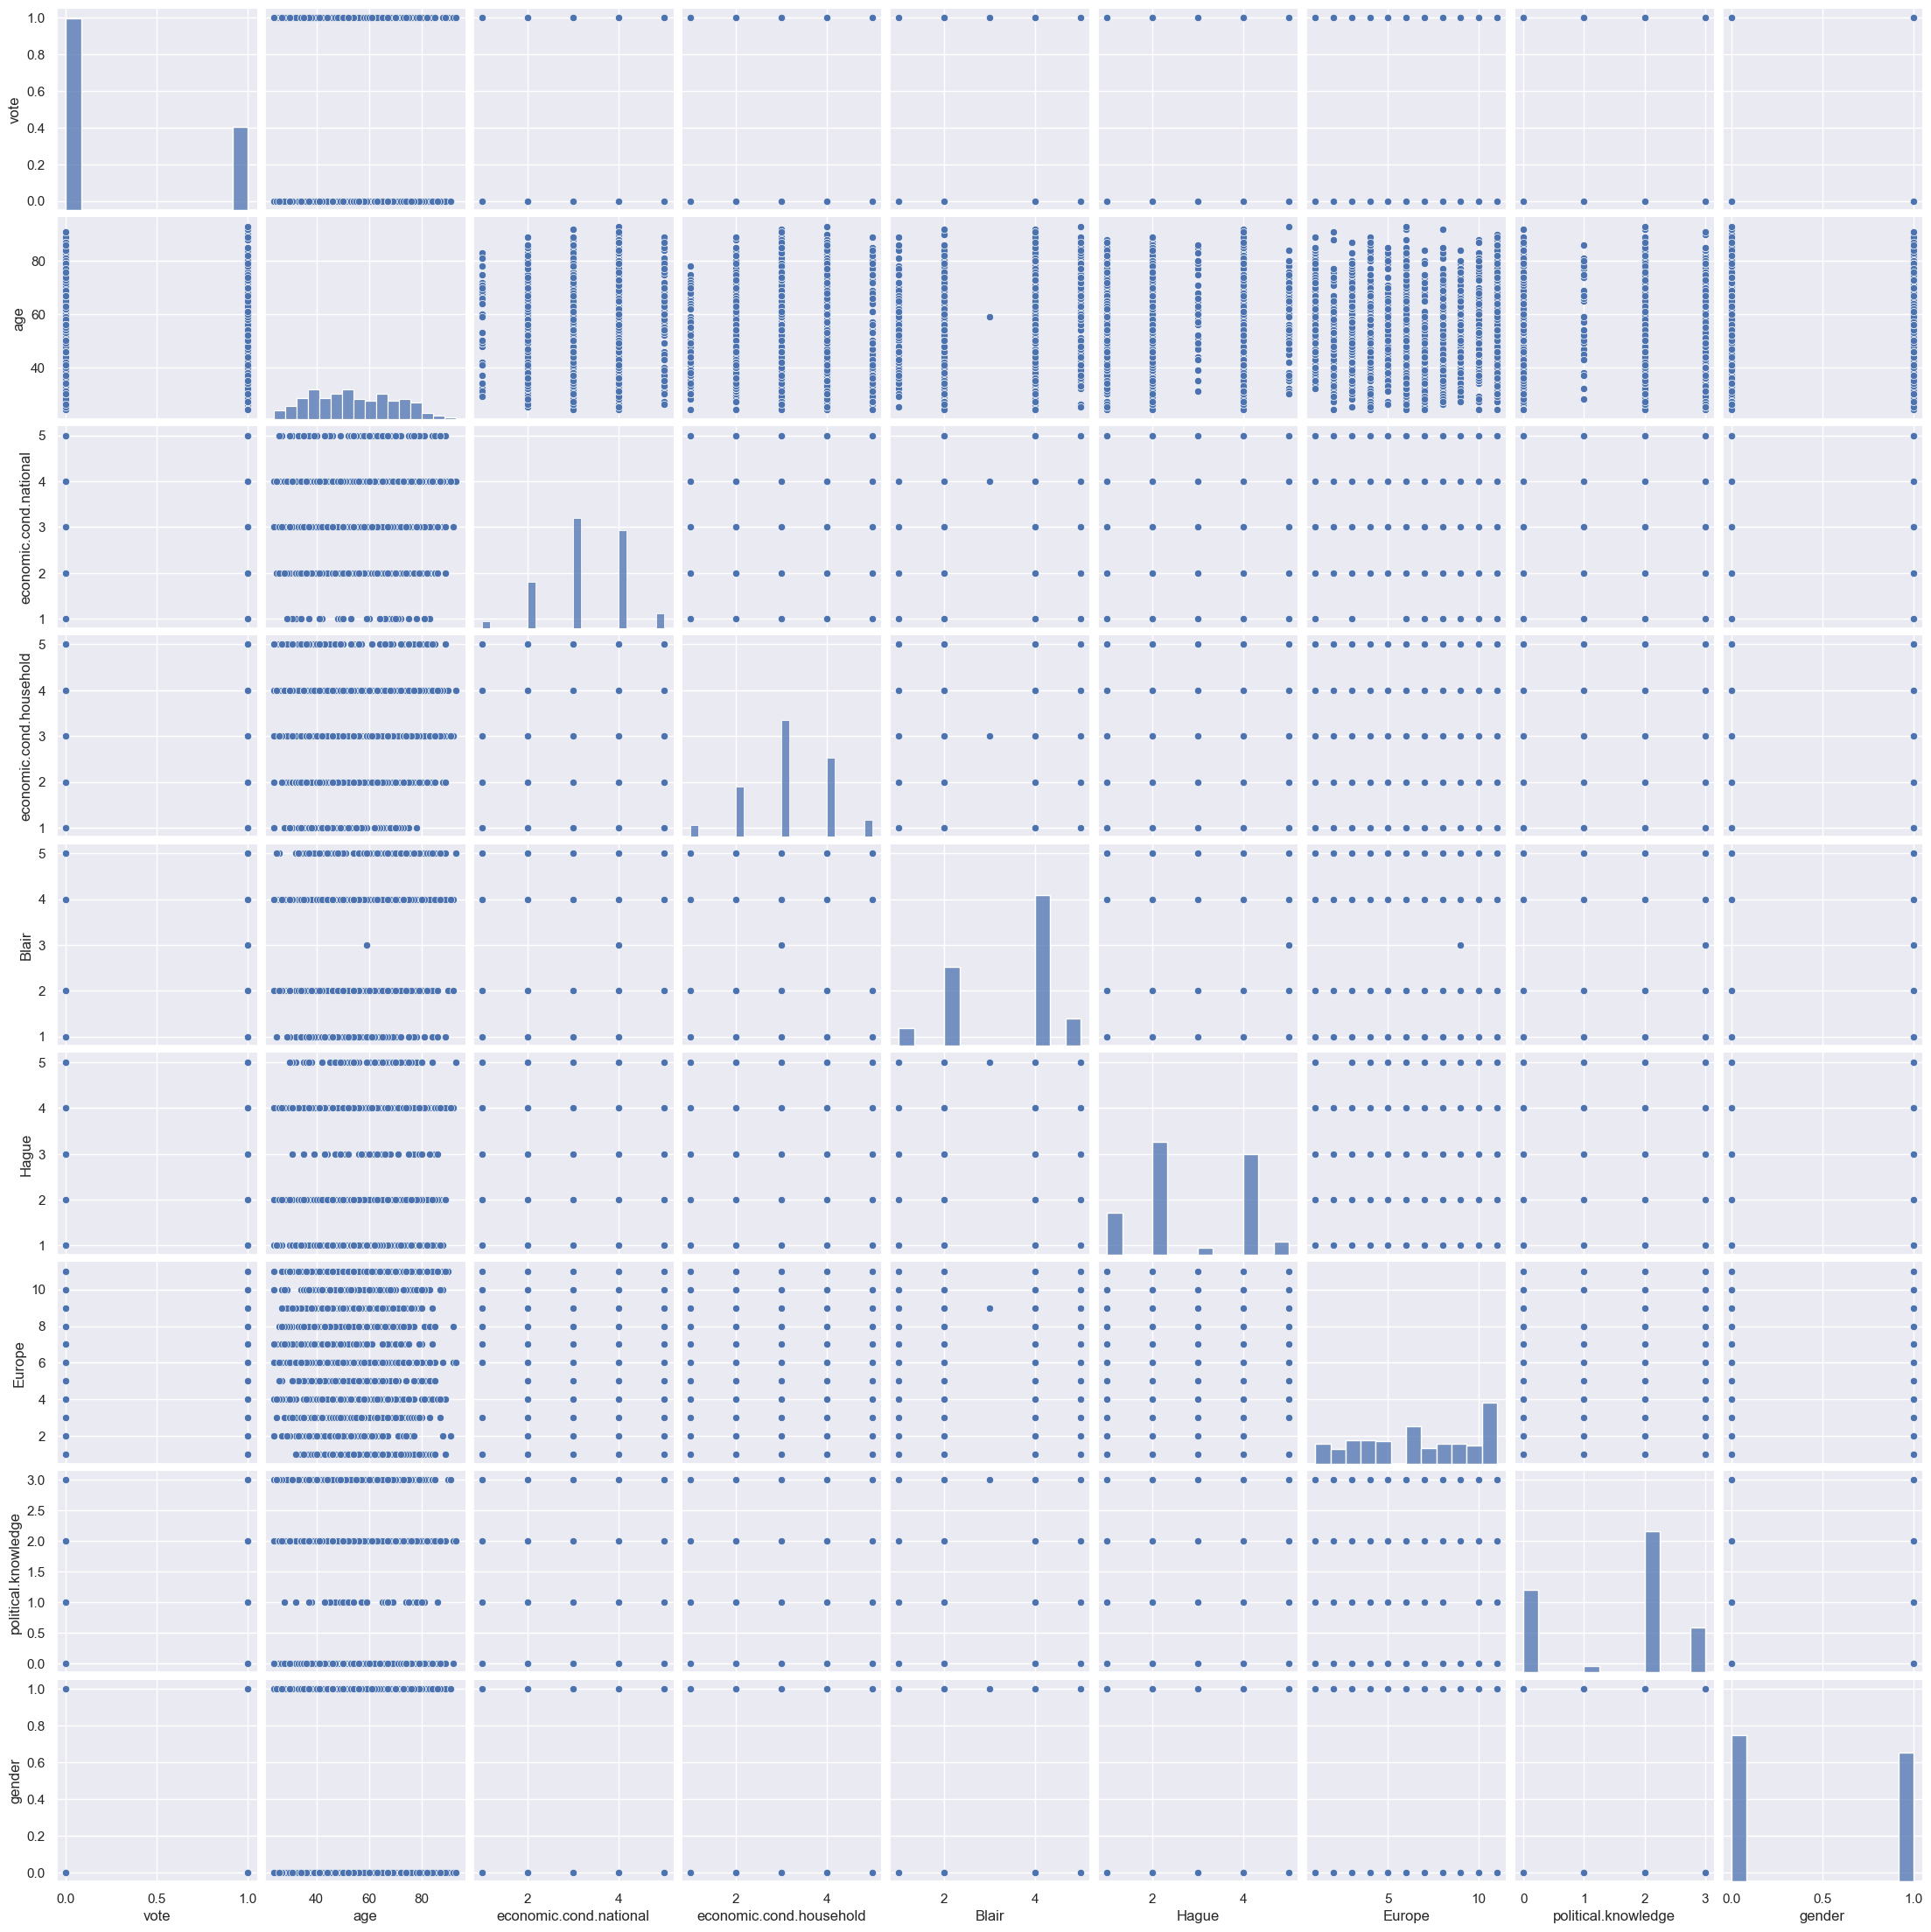

In [15]:
sns.pairplot(election)

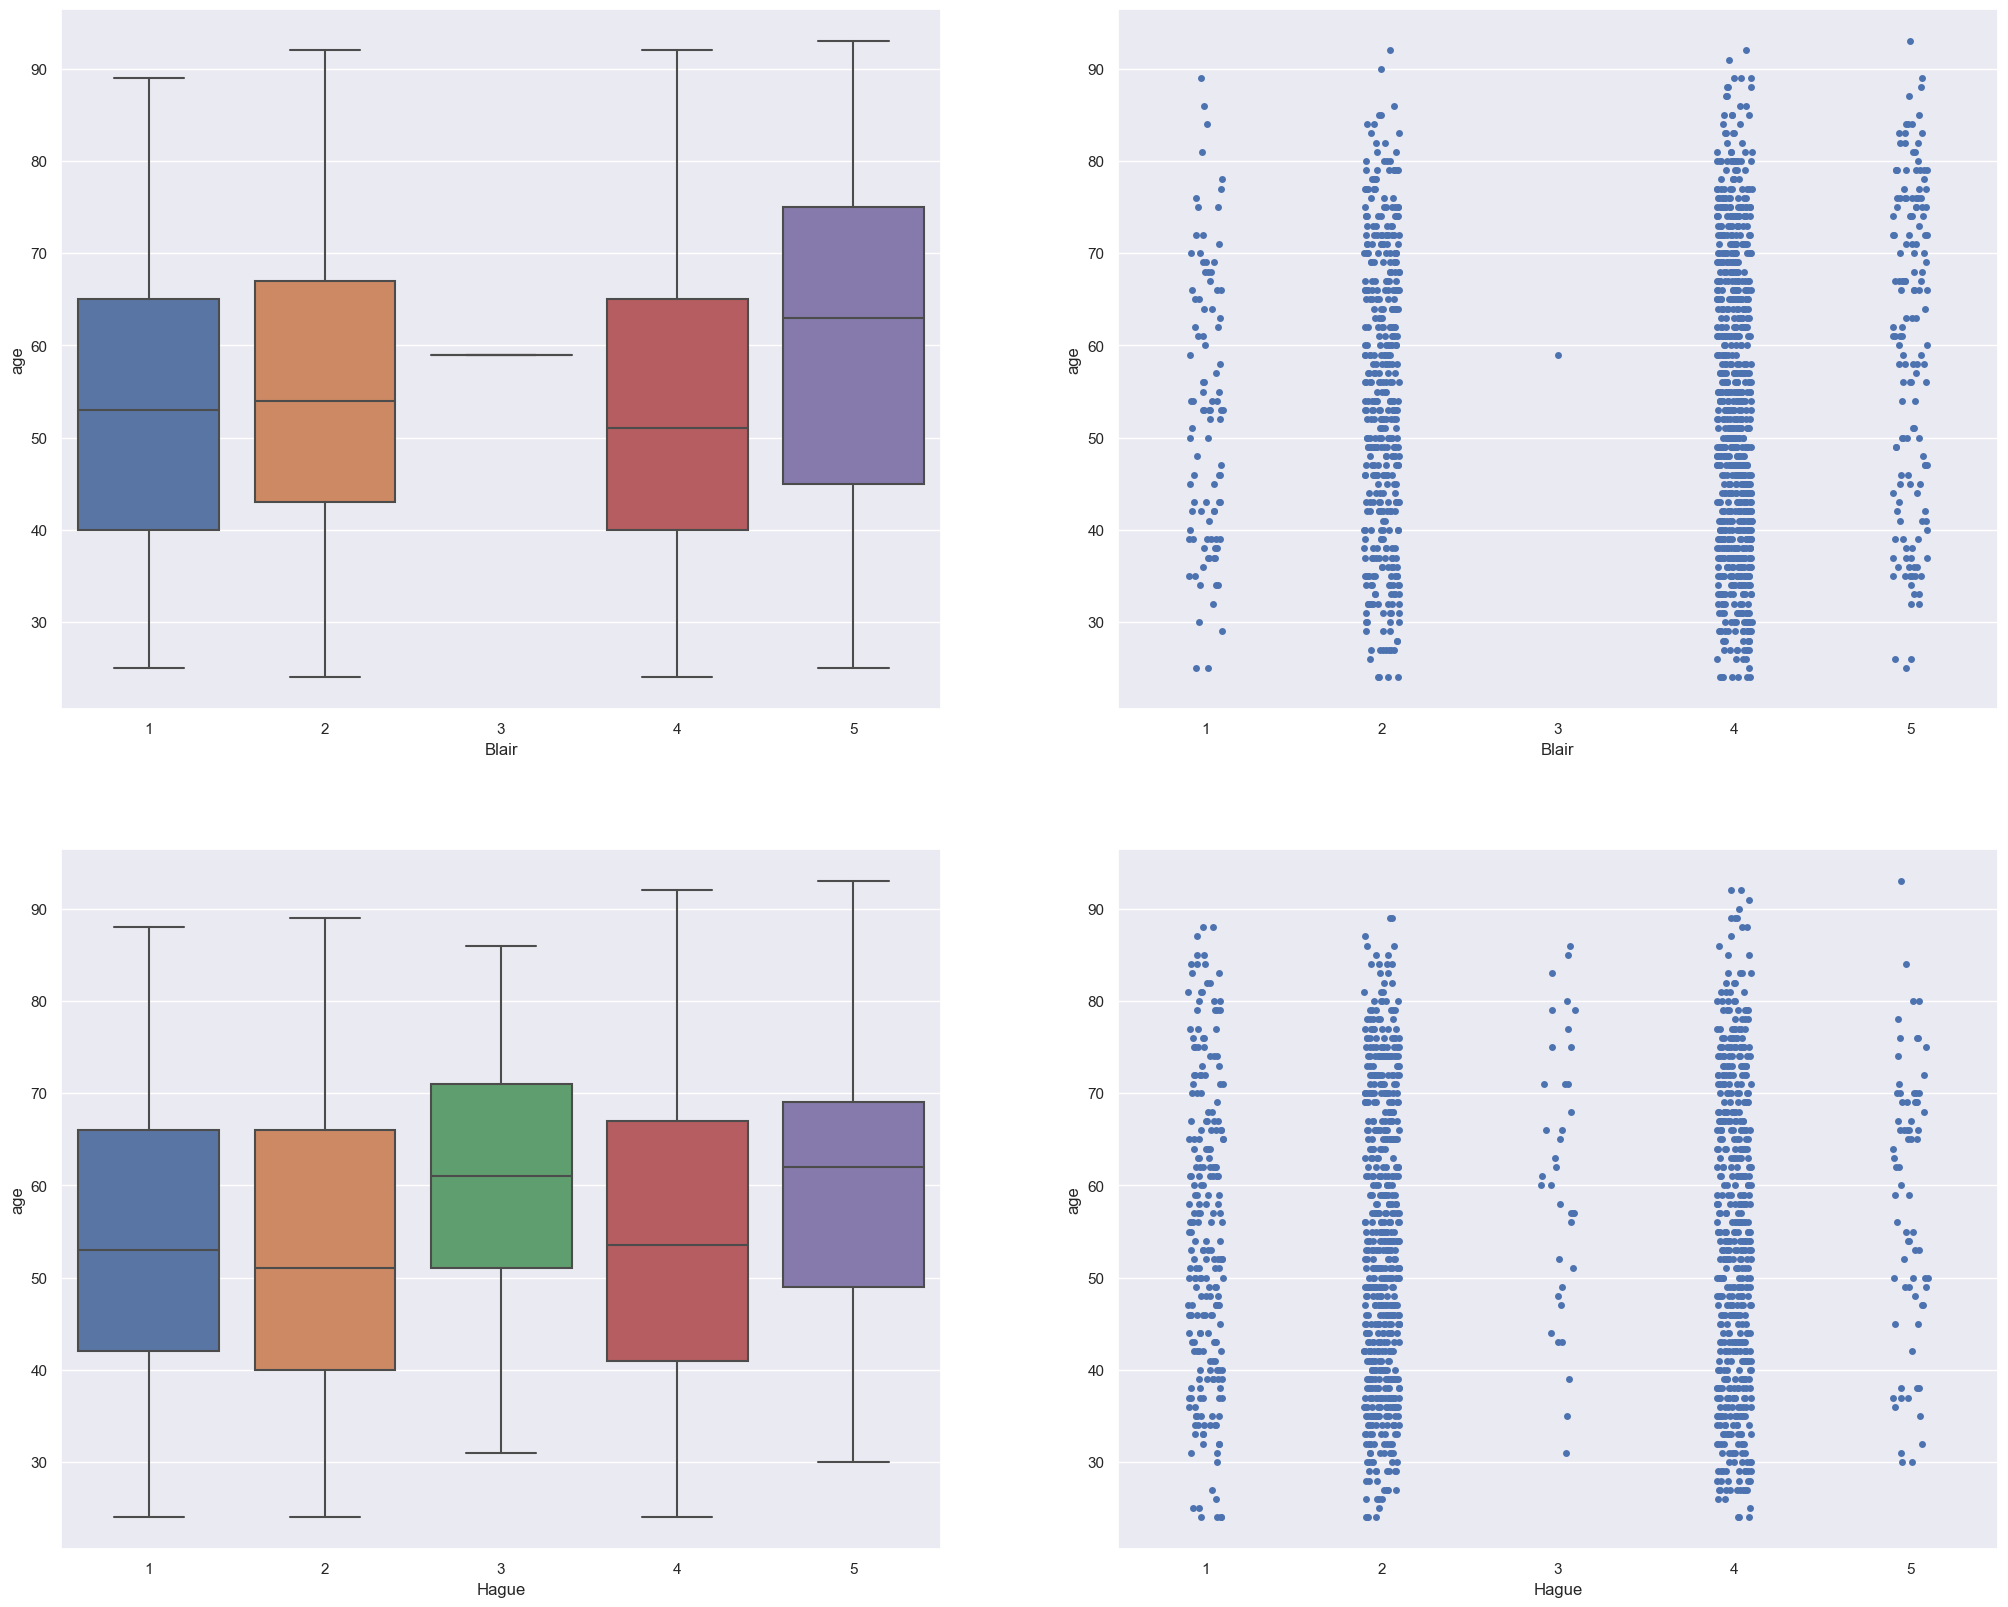

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(25, 20)

sns.boxplot(x=election["Blair"], y=election["age"], ax=axes[0][0])
sns.stripplot(x=election["Blair"], y=election["age"], ax=axes[0][1])
sns.boxplot(x=election["Hague"], y=election["age"], ax=axes[1][0])
sns.stripplot(x=election["Hague"], y=election["age"], ax=axes[1][1])

plt.show()

<Axes: xlabel='Blair', ylabel='Count'>

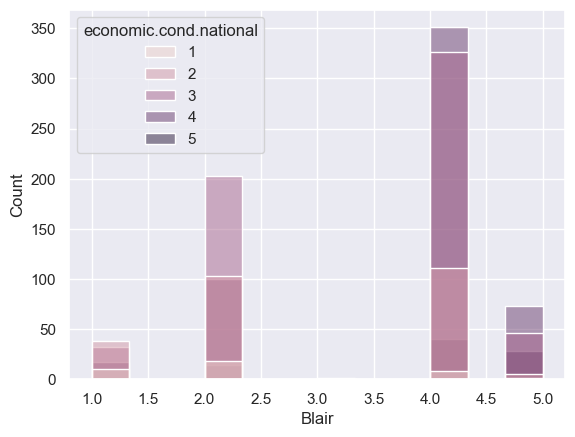

In [17]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.national")

<Axes: xlabel='Blair', ylabel='Count'>

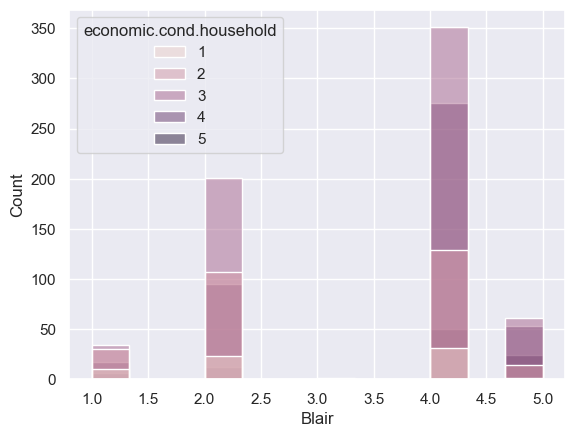

In [18]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.household")

<Axes: xlabel='Hague', ylabel='Count'>

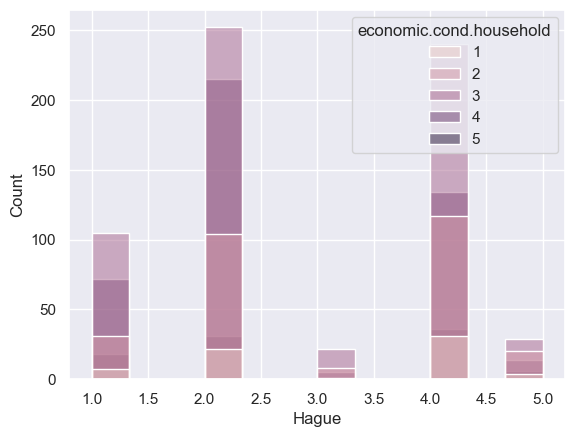

In [19]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.household")

<Axes: xlabel='Hague', ylabel='Count'>

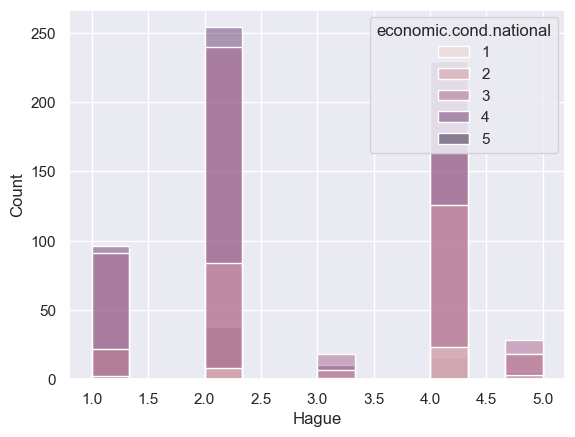

In [20]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.national")

<Axes: xlabel='Blair', ylabel='Count'>

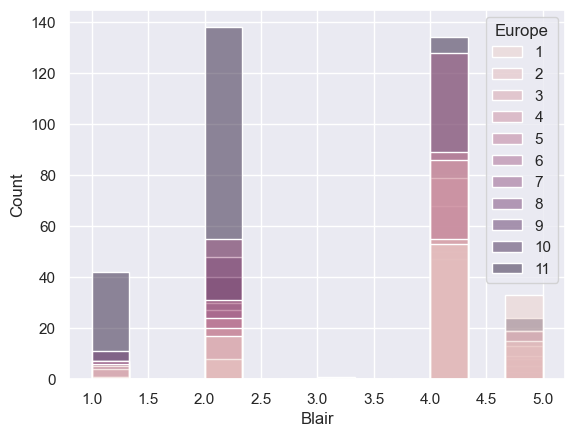

In [21]:
sns.histplot(data =election , x = "Blair", hue = "Europe")

<Axes: xlabel='Hague', ylabel='Count'>

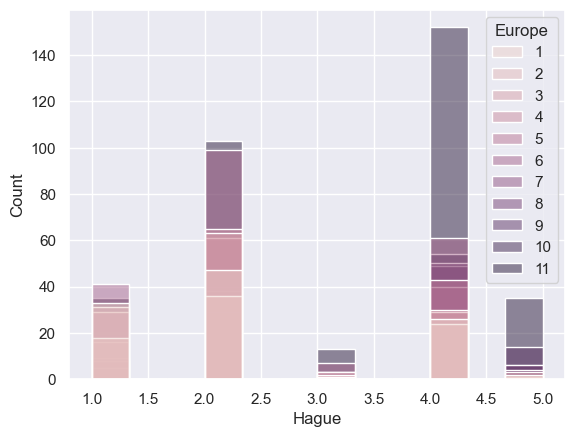

In [22]:
sns.histplot(data =election , x = "Hague", hue = "Europe")

<Axes: xlabel='Hague', ylabel='Count'>

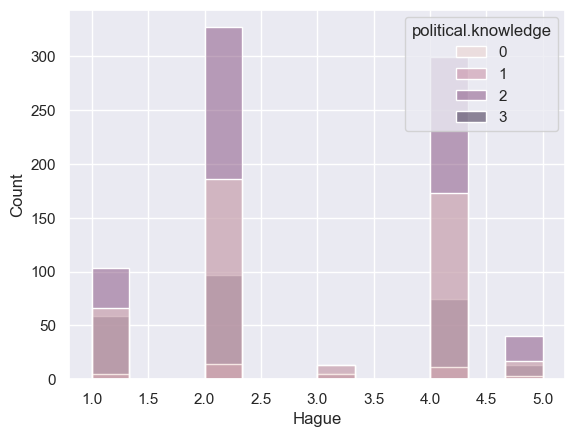

In [23]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

In [24]:
covMatrix = np.cov(election,bias=True)
print (covMatrix)

[[168.69135802 135.48148148 133.34567901 ... 141.51851852 234.92592593
  289.54320988]
 [135.48148148 110.         107.40740741 ... 114.11111111 191.11111111
  235.14814815]
 [133.34567901 107.40740741 105.72839506 ... 112.03703704 185.40740741
  228.60493827]
 ...
 [141.51851852 114.11111111 112.03703704 ... 119.55555556 196.88888889
  242.96296296]
 [234.92592593 191.11111111 185.40740741 ... 196.88888889 338.
  414.59259259]
 [289.54320988 235.14814815 228.60493827 ... 242.96296296 414.59259259
  509.50617284]]


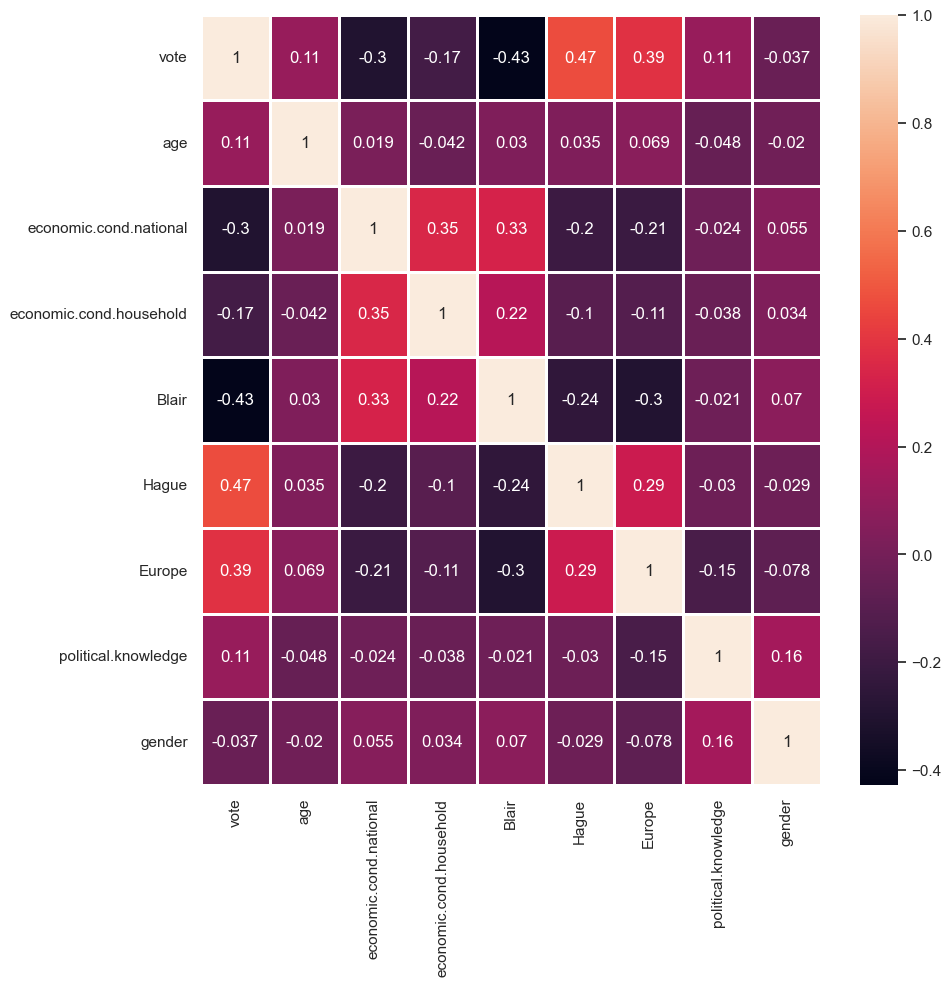

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(election.corr(), annot=True,linewidth = 1)

# Data Pre-processing

### Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

In [26]:
#from sklearn.preprocessing import MinMaxScaler

In [27]:

from sklearn.model_selection import train_test_split

In [28]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")

In [29]:
#x = np.linspace(0, 2*np.pi, 8)
#y = np.sin(x) + np.random.normal(0, 0.4, 8)

In [30]:
#x = x.reshape(-1, 1)

In [31]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

# Apply Logistic Regression and LDA (Linear Discriminant Analysis)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [37]:
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000, random_state=0)

In [38]:
y_train_predict=lr.predict(x_train)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Axes(0.125,0.11;0.62x0.77)


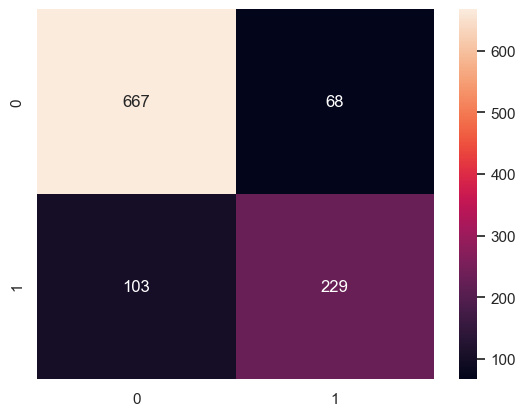

In [42]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [43]:
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

[[292  36]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [44]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16026241799437677


In [45]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.17685589519650655


In [46]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.889


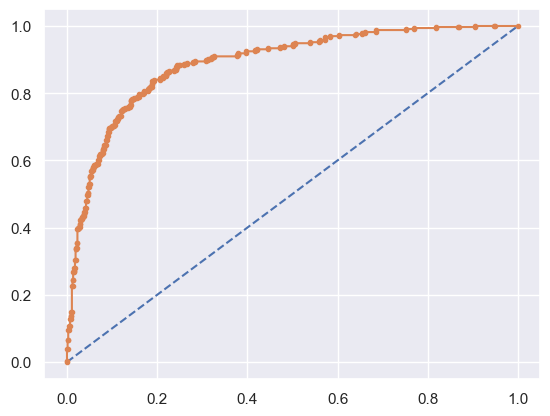

In [47]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.882


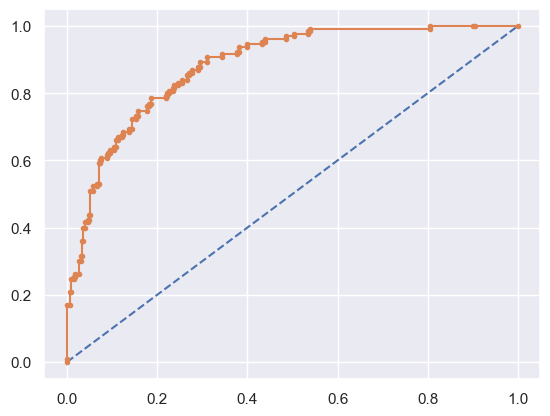

In [48]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Linear Discriminant Analysis

In [49]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
lda = LinearDiscriminantAnalysis()

In [51]:
lda = lda.fit(x_train,y_train)

In [52]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[660  99]
 [ 75 233]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       759
           1       0.70      0.76      0.73       308

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [53]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[289  44]
 [ 39  86]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       333
           1       0.66      0.69      0.67       125

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.889


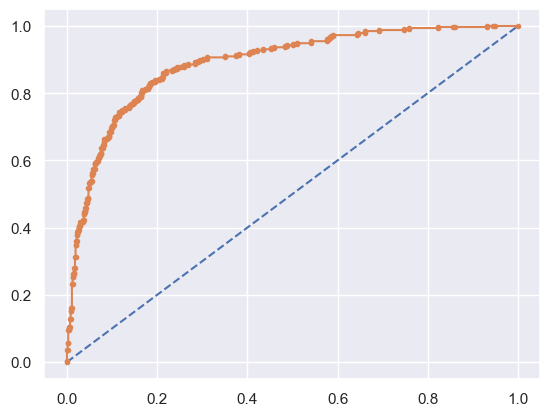

In [54]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.884


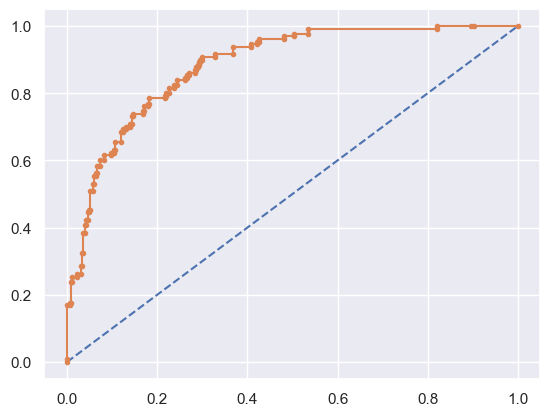

In [55]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Apply KNN Model and Naïve Bayes Model. Interpret the results

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [58]:
knn = knn.fit(x_train,y_train)

In [59]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.7860262008733624

In [60]:
print(confusion_matrix(knn.predict(x_train),y_train))


[[673  86]
 [ 62 246]]


In [61]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.62      0.62       130

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



AUC: 0.924


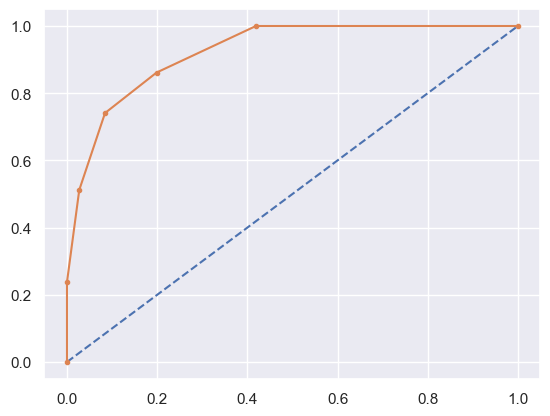

In [65]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.832


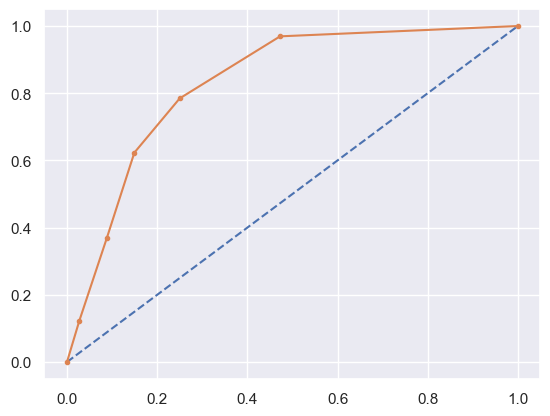

In [66]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.832


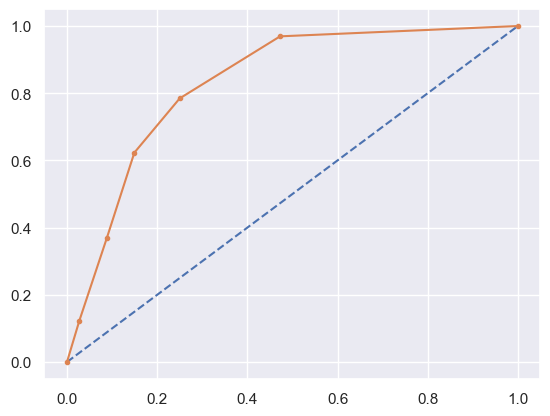

In [64]:

# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# naive bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
nb=GaussianNB()

In [69]:
nb= nb.fit(x_train, y_train)

In [70]:
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

[[649  92]
 [ 86 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       741
           1       0.72      0.74      0.73       326

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [71]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[284  36]
 [ 44  94]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       320
           1       0.72      0.68      0.70       138

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458



AUC: 0.886


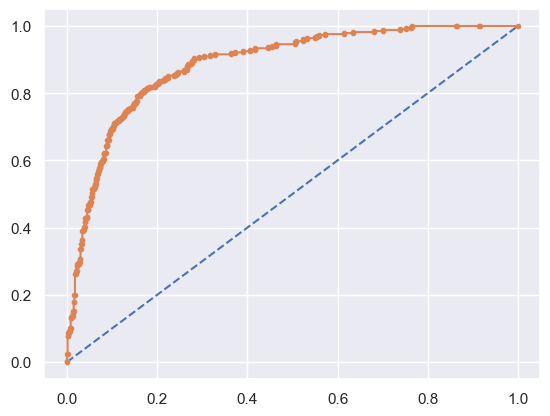

In [72]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.885


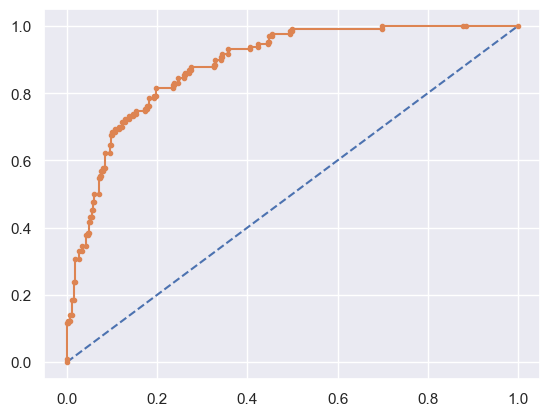

In [73]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [75]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [76]:
ADB_model=AdaBoostClassifier()

In [77]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [78]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [80]:
ADB_model=grid_search.best_estimator_

In [81]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000)

In [82]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8350515463917526
[[674  61]
 [115 217]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       735
           1       0.78      0.65      0.71       332

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



AUC: 0.902


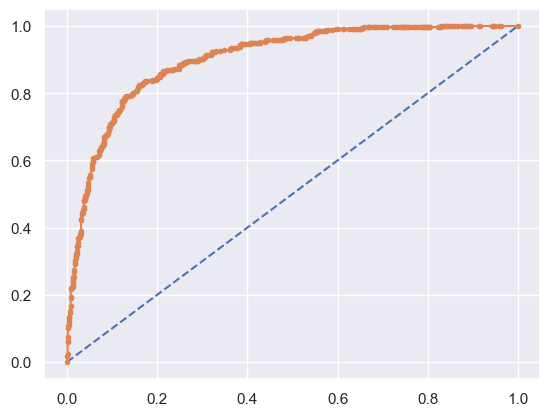

In [83]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [84]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8318777292576419
[[296  32]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       328
           1       0.73      0.65      0.69       130

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.893


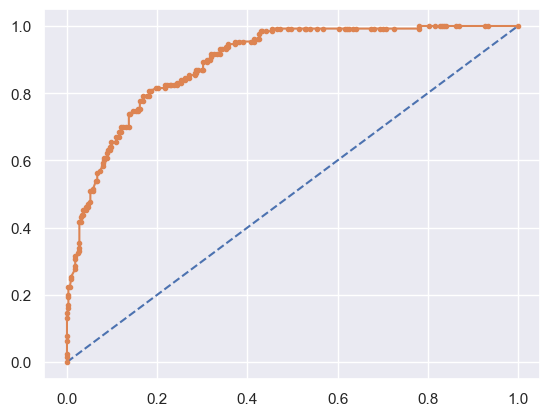

In [85]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [92]:
DT_model= DecisionTreeClassifier()

In [93]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [94]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [97]:
DT_model=grid_search.best_estimator_

In [98]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

In [99]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.837863167760075
[[663  72]
 [101 231]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.896


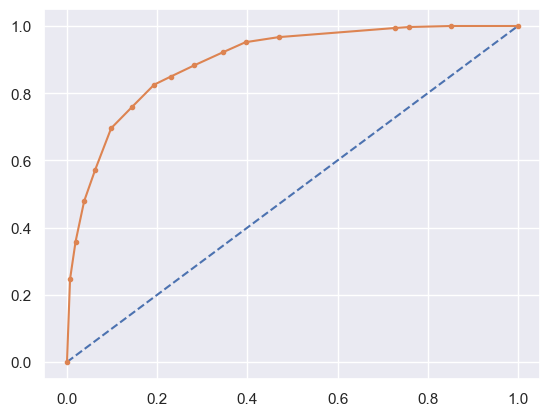

In [100]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [101]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8144104803493449
[[285  43]
 [ 42  88]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC: 0.870


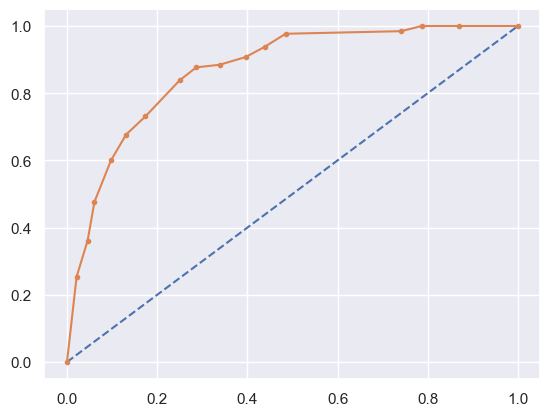

In [102]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [105]:

RF_model=RandomForestClassifier()

In [106]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [107]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [108]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [109]:
RF_model=grid_search.best_estimator_

In [110]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [111]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8388003748828491
[[687  48]
 [124 208]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       735
           1       0.81      0.63      0.71       332

    accuracy                           0.84      1067
   macro avg       0.83      0.78      0.80      1067
weighted avg       0.84      0.84      0.83      1067



AUC: 0.906


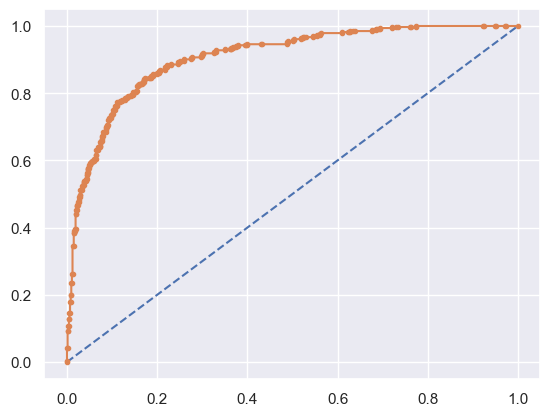

In [112]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [113]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.834061135371179
[[300  28]
 [ 48  82]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       328
           1       0.75      0.63      0.68       130

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.895


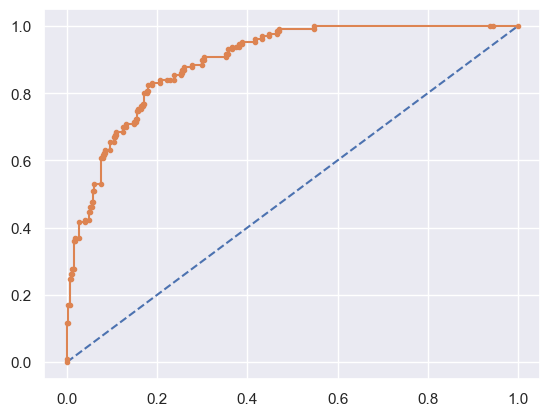

In [114]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Based on the predictions, here are the insights:

Model Performance Comparison:

1.The Naïve Bayes model from the second iteration is performing the best among all the models.
2.Although SVM and Extreme Boosting models are performing almost as well as Naïve Bayes, the Naïve Bayes model shows more consistency when comparing train and test results.
3.Other performance parameters such as Recall value, AUC_SCORE, and AUC_ROC_Curve for the Naïve Bayes model are also quite good.
Political Party Performance:

1.The Labour party is performing significantly better than the Conservative party.
Voter Demographics:

2.Female voter turnout is greater than male voter turnout.
Economic Conditions and Voting Preferences:

1.Individuals who perceive better national economic conditions are more likely to vote for the Labour party.
Euroscepticism and Voting Preferences:

2.People with higher Eurosceptic sentiments are more likely to prefer voting for the Conservative party.
Political Knowledge and Voting Preferences:

3Those with higher political knowledge tend to vote for the Conservative party.
Leader Assessment:

4The Labour leader is performing well, receiving better ratings in assessments compared to the Conservative leader.
-These insights help in understanding the dynamics of voter preferences and the performance of different political parties and leaders.

# Problem 2
 

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [134]:
import nltk
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

# Define the problem and Perform Exploratory Data Analysis

In [135]:
from nltk.corpus import inaugural
from nltk.tokenize import sent_tokenize, word_tokenize

# Get the text of each speech
roosevelt_text = inaugural.raw('1941-Roosevelt.txt')
kennedy_text = inaugural.raw('1961-Kennedy.txt')
nixon_text = inaugural.raw('1973-Nixon.txt')

# Count the number of characters
roosevelt_chars = len(roosevelt_text)
kennedy_chars = len(kennedy_text)
nixon_chars = len(nixon_text)

# Tokenize the text to count words and sentences
roosevelt_words = word_tokenize(roosevelt_text)
roosevelt_word_count = len(roosevelt_words)
roosevelt_sentences = sent_tokenize(roosevelt_text)
roosevelt_sentence_count = len(roosevelt_sentences)

kennedy_words = word_tokenize(kennedy_text)
kennedy_word_count = len(kennedy_words)
kennedy_sentences = sent_tokenize(kennedy_text)
kennedy_sentence_count = len(kennedy_sentences)

nixon_words = word_tokenize(nixon_text)
nixon_word_count = len(nixon_words)
nixon_sentences = sent_tokenize(nixon_text)
nixon_sentence_count = len(nixon_sentences)

# Print the results
print("Speech by President Roosevelt (1941):")
print(f"Number of characters: {roosevelt_chars}")
print(f"Number of words: {roosevelt_word_count}")
print(f"Number of sentences: {roosevelt_sentence_count}\n")

print("Speech by President Kennedy (1961):")
print(f"Number of characters: {kennedy_chars}")
print(f"Number of words: {kennedy_word_count}")
print(f"Number of sentences: {kennedy_sentence_count}\n")

print("Speech by President Nixon (1973):")
print(f"Number of characters: {nixon_chars}")
print(f"Number of words: {nixon_word_count}")
print(f"Number of sentences: {nixon_sentence_count}")


Speech by President Roosevelt (1941):
Number of characters: 7571
Number of words: 1526
Number of sentences: 68

Speech by President Kennedy (1961):
Number of characters: 7618
Number of words: 1543
Number of sentences: 52

Speech by President Nixon (1973):
Number of characters: 9991
Number of words: 2006
Number of sentences: 68


In [136]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Tokenize, remove stopwords, and stem the words for each speech
roosevelt_words_cleaned = [stemmer.stem(word.lower()) for word in word_tokenize(roosevelt_text) if word.isalpha() and word.lower() not in stop_words]
kennedy_words_cleaned = [stemmer.stem(word.lower()) for word in word_tokenize(kennedy_text) if word.isalpha() and word.lower() not in stop_words]
nixon_words_cleaned = [stemmer.stem(word.lower()) for word in word_tokenize(nixon_text) if word.isalpha() and word.lower() not in stop_words]

# Count the frequency of each word
roosevelt_word_freq = Counter(roosevelt_words_cleaned)
kennedy_word_freq = Counter(kennedy_words_cleaned)
nixon_word_freq = Counter(nixon_words_cleaned)

# Find the three most common words in all three speeches
common_words = (roosevelt_word_freq & kennedy_word_freq & nixon_word_freq).most_common(3)

# Print the results
print("Three most common words used in all three speeches:")
for word, freq in common_words:
    print(f"{word}: {freq} times")


Three most common words used in all three speeches:
nation: 8 times
us: 8 times
freedom: 4 times


In [141]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize the text and remove stopwords for each speech
roosevelt_words_cleaned = [word.lower() for word in word_tokenize(roosevelt_text) if word.isalpha() and word.lower() not in stop_words]
kennedy_words_cleaned = [word.lower() for word in word_tokenize(kennedy_text) if word.isalpha() and word.lower() not in stop_words]
nixon_words_cleaned = [word.lower() for word in word_tokenize(nixon_text) if word.isalpha() and word.lower() not in stop_words]

# Count the number of words after stop-word removal
roosevelt_word_count_cleaned = len(roosevelt_words_cleaned)
kennedy_word_count_cleaned = len(kennedy_words_cleaned)
nixon_word_count_cleaned = len(nixon_words_cleaned)

# Get the most common words
roosevelt_common_words = Counter(roosevelt_words_cleaned).most_common(3)
kennedy_common_words = Counter(kennedy_words_cleaned).most_common(3)
nixon_common_words = Counter(nixon_words_cleaned).most_common(3)

# Print the word count and most common words after stop-word removal
print("Word count after stop-word removal:")
print(f"• President Franklin D. Roosevelt's speech has {roosevelt_word_count_cleaned} words.")
print(f"• President John F. Kennedy's speech has {kennedy_word_count_cleaned} words.")
print(f"• President Richard Nixon's speech has {nixon_word_count_cleaned} words.")

print("\nMost common words after stop-word removal:")
print(f"• President Franklin D. Roosevelt's most common words: {roosevelt_common_words}")
print(f"• President John F. Kennedy's most common words: {kennedy_common_words}")
print(f"• President Richard Nixon's most common words: {nixon_common_words}")


Word count after stop-word removal:
• President Franklin D. Roosevelt's speech has 617 words.
• President John F. Kennedy's speech has 684 words.
• President Richard Nixon's speech has 822 words.

Most common words after stop-word removal:
• President Franklin D. Roosevelt's most common words: [('nation', 12), ('know', 10), ('spirit', 9)]
• President John F. Kennedy's most common words: [('let', 16), ('us', 12), ('world', 8)]
• President Richard Nixon's most common words: [('us', 26), ('let', 22), ('america', 21)]


# Problem 2 - Plot Word cloud of all three speeches
- Show the most common words used in all three speeches in the form of word clouds

In [142]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


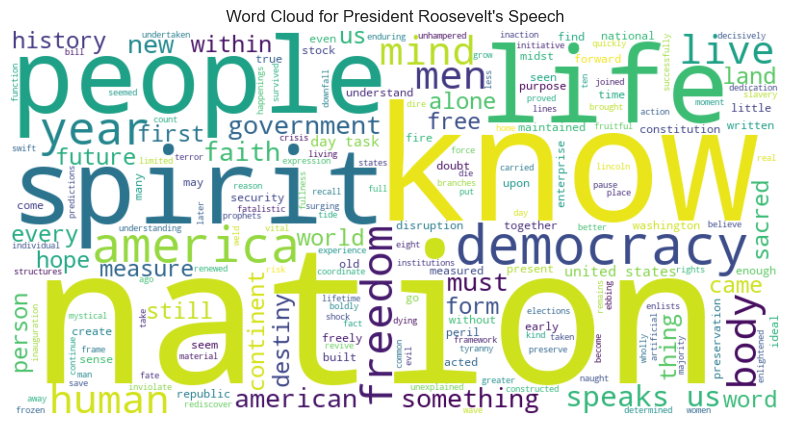

In [144]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words in Roosevelt's speech
roosevelt_combined_text = ' '.join(roosevelt_words_cleaned)

# Generate word cloud for Roosevelt's speech
wordcloud_roosevelt = WordCloud(width=800, height=400, background_color='white').generate(roosevelt_combined_text)

# Plot the word cloud for Roosevelt's speech
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_roosevelt, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for President Roosevelt's Speech")
plt.show()


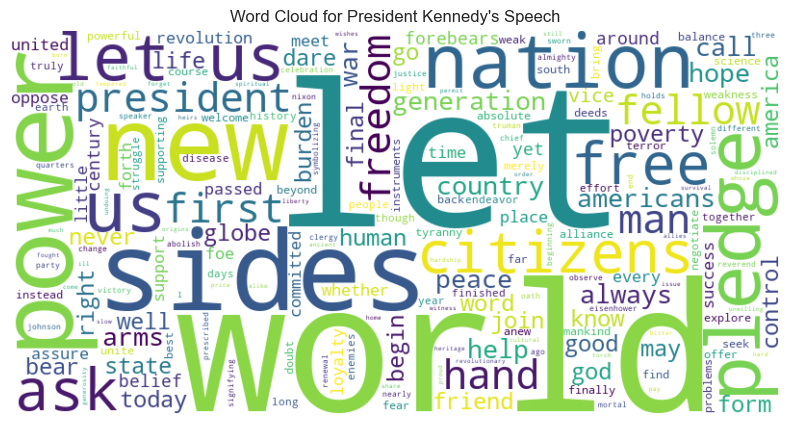

In [145]:
#WorldCloud of Kennedy Speech 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words in Kennedy's speech
kennedy_combined_text = ' '.join(kennedy_words_cleaned)

# Generate word cloud for Kennedy's speech
wordcloud_kennedy = WordCloud(width=800, height=400, background_color='white').generate(kennedy_combined_text)

# Plot the word cloud for Kennedy's speech
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_kennedy, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for President Kennedy's Speech")
plt.show()


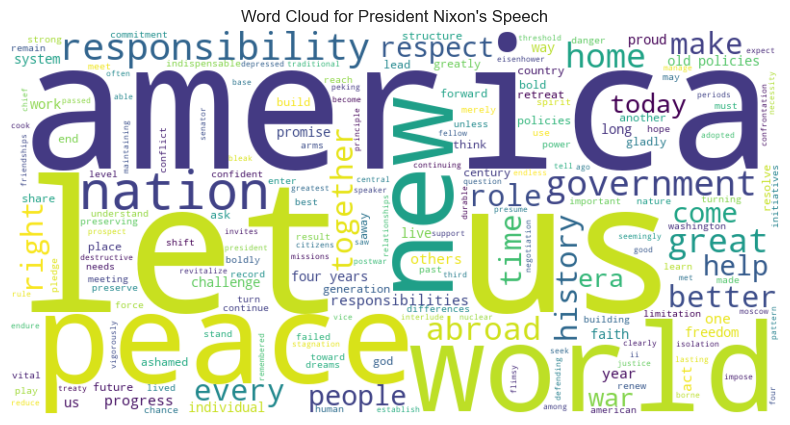

In [146]:
#Word cloud of Nixon's speech:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words in Nixon's speech
nixon_combined_text = ' '.join(nixon_words_cleaned)

# Generate word cloud for Nixon's speech
wordcloud_nixon = WordCloud(width=800, height=400, background_color='white').generate(nixon_combined_text)

# Plot the word cloud for Nixon's speech
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nixon, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for President Nixon's Speech")
plt.show()


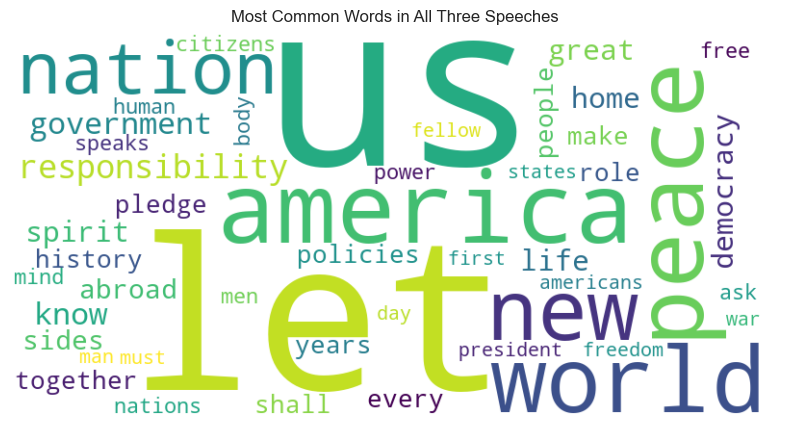

In [143]:
#Most Common in all three Speeches :

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize the text and remove stopwords for each speech
roosevelt_words_cleaned = [word.lower() for word in word_tokenize(roosevelt_text) if word.isalpha() and word.lower() not in stop_words]
kennedy_words_cleaned = [word.lower() for word in word_tokenize(kennedy_text) if word.isalpha() and word.lower() not in stop_words]
nixon_words_cleaned = [word.lower() for word in word_tokenize(nixon_text) if word.isalpha() and word.lower() not in stop_words]

# Get the most common words
roosevelt_common_words = Counter(roosevelt_words_cleaned).most_common(20)
kennedy_common_words = Counter(kennedy_words_cleaned).most_common(20)
nixon_common_words = Counter(nixon_words_cleaned).most_common(20)

# Combine all common words from three speeches
all_common_words = dict(roosevelt_common_words + kennedy_common_words + nixon_common_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_common_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in All Three Speeches')
plt.show()
